# Scan an input parameter with bolo-calc 

4/1/2021, JR.
In this version we scan over an input parameter manually, not using bolo-calc's built-in tools for that.

A chosen output parameter (eg 'NET') is plotted vs the input parameter, for each channel in the yaml file.

In [1]:
# Standard imports
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 20]

# bolo-calc import
from bolo import Top

#### Read a yaml file into a python dictionary

In [2]:
dd = yaml.safe_load(open('SPLAT_20210401.yaml'))
version_date = str(dd['version']['date'])
version_telescope = str(dd['version']['name'])
del dd['version']

# location of atmosphere file
dd['sim_config']['config_dir'] = '/Users/ruhl/code/bolo-calc/config'

in_param = 'carrier_index'
base_value = dd['instrument']['channel_default'][in_param]
param_vec = np.arange(1.0,3.0,0.1)
# in_param possible values:
#  'band_response', 'num_wafer_per_optics_tube', 'num_optics_tube', 
#  'waist_factor', 'psat', 'psat_factor', 'carrier_index', 'Tc', 'Tc_fraction', 
#  'G', 'Flink', 'Yield', 'response_factor', 'bolo_resistance', 'read_frac'

out_param = 'NET' #
# out_param possible values:
#  'effic', 'opt_power','tel_rj_temp','sky_rj_temp','NEP_bolo',
#  'NEP_read','NEP_ph','NEP','NET','NET_corr','corr_fact','NET_arr'

In [3]:
ch_names = list(dd['instrument']['camera_config']['elements']['cam_1']['chan_config']['elements'].keys())
outputs = {}
outputs[out_param]={}
for chan in ch_names:
    outputs[out_param][chan]=np.array([])

for param_value in param_vec:
    dd['instrument']['channel_default'][in_param] = param_value
    top = Top(**dd)
    top.run()
    tabs = top.instrument.tables
    for chan in ch_names:
        outputs[out_param][chan] = np.append(outputs[out_param][chan], tabs['cam_1_%s_sims' % chan][out_param].quantity[0])

Text(0.5, 1.0, 'Telescope: SPLAT,   Version:20210401')

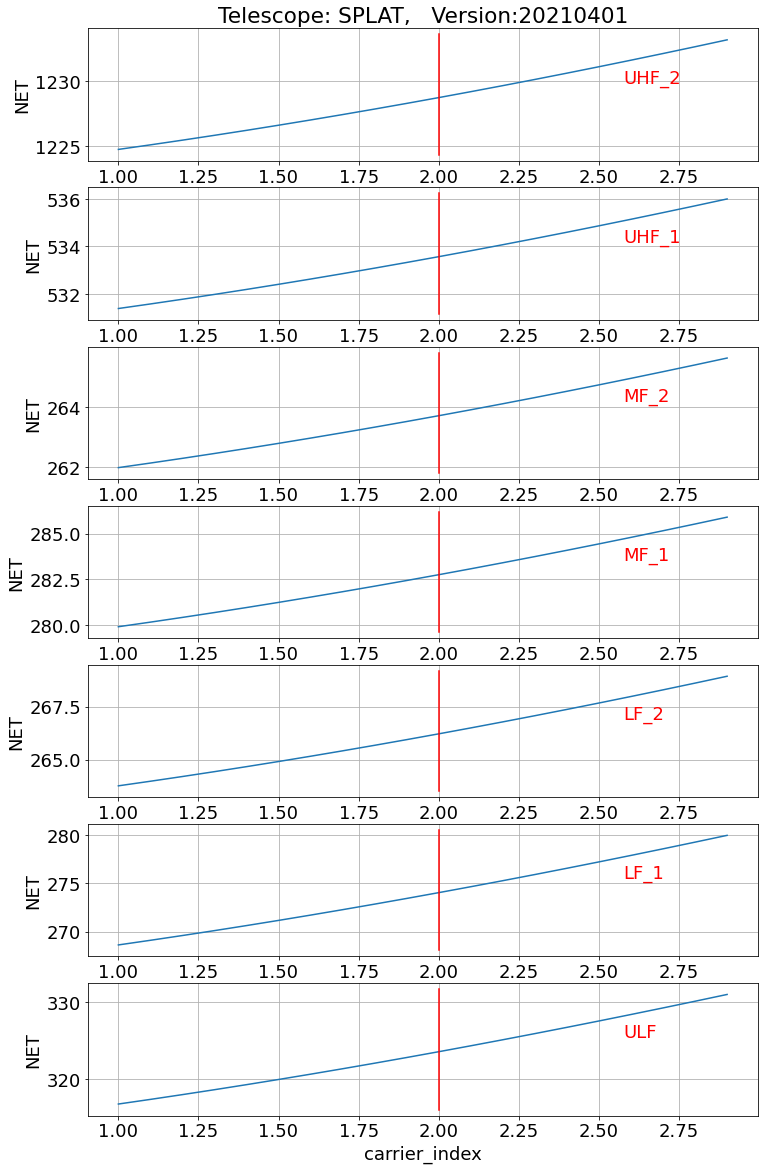

In [4]:
plt.clf()
n_chan = len(ch_names)
ii = n_chan

for chan in ch_names:
    plt.subplot(n_chan,1,ii)
    plt.plot(param_vec,outputs[out_param][chan])
    plt.ylabel(out_param)
    if ii == n_chan:
        plt.xlabel(in_param)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.plot([base_value,base_value],[ymin,ymax],'r')
    xloc = xmin + 0.8*(xmax-xmin)
    yloc = ymin + 0.6*(ymax-ymin)
    plt.text(xloc,yloc,chan,color='r')
    plt.grid()
    ii = ii-1
titlestring = 'Telescope: '+version_telescope+',   Version:'+version_date
plt.title(titlestring)


In [5]:
tabs['cam_1_ULF_sims']['G'].quantity

<Quantity [11.78259217]>

In [6]:
tabs['cam_1_ULF_sims'].keys()

['effic',
 'opt_power',
 'P_sat',
 'Flink',
 'G',
 'tel_rj_temp',
 'sky_rj_temp',
 'NEP_bolo',
 'NEP_read',
 'NEP_ph',
 'NEP',
 'NET',
 'NET_corr',
 'corr_fact',
 'NET_arr']

In [7]:
len(ch_names)

7